In [2]:
from model import *
from utils import *
import pandas as pd


df_train = pd.read_csv("digit_data.csv")

df_train = shuffle_rows(df_train)

train_val_split = 0.8
train_size = round(df_train.shape[0] * train_val_split)
data_train = df_train[:train_size, :].T
data_val = df_train[train_size:, :].T

X_train = data_train[1:]
y_train = data_train[0]
X_test = data_val[1:]
y_test = data_val[0]

X_train = normalize_pixels(X_train)
X_test = normalize_pixels(X_test)

print(X_test.shape)
print(y_test.shape)

(784, 8400)
(8400,)


### Comparing the performance of model with different hidden layer activation

Iteration 1: Accuracy = 0.08779761904761904, Loss = 2.510002471632546
Iteration 5: Accuracy = 0.3551488095238095, Loss = 2.054386631340425
Iteration 10: Accuracy = 0.6061309523809524, Loss = 1.7314065105051715
Iteration 15: Accuracy = 0.6929166666666666, Loss = 1.4507783449043665
Iteration 20: Accuracy = 0.7444940476190476, Loss = 1.224460262516931
Iteration 25: Accuracy = 0.7794345238095238, Loss = 1.0552750374462108
Iteration 30: Accuracy = 0.80125, Loss = 0.93064527631176
Iteration 35: Accuracy = 0.8185714285714286, Loss = 0.8372493588535828
Iteration 40: Accuracy = 0.8308333333333333, Loss = 0.765549158973809
Iteration 45: Accuracy = 0.839375, Loss = 0.7092205109373412
Iteration 50: Accuracy = 0.8463095238095238, Loss = 0.6640502977943857
Iteration 55: Accuracy = 0.851547619047619, Loss = 0.6271962699197652
Iteration 60: Accuracy = 0.8567857142857143, Loss = 0.5965923034406327
Iteration 65: Accuracy = 0.8613988095238095, Loss = 0.5707963232031211
Iteration 70: Accuracy = 0.864375, 

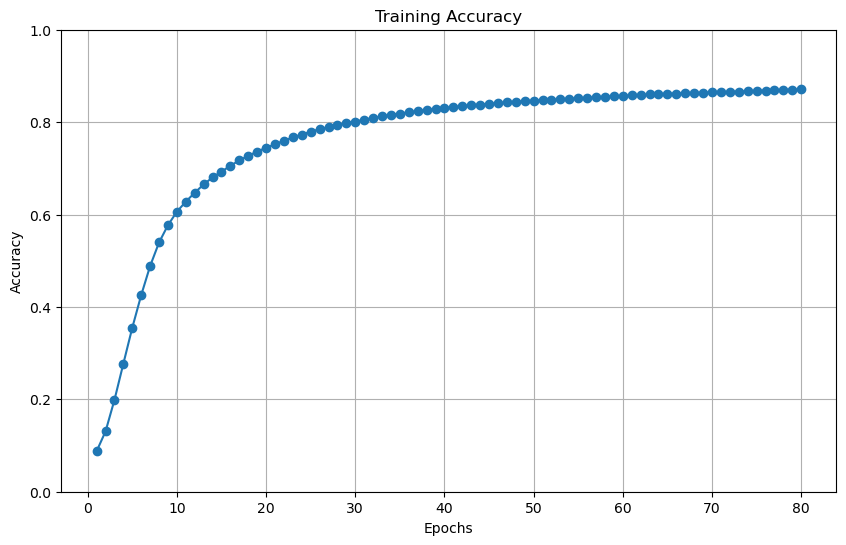

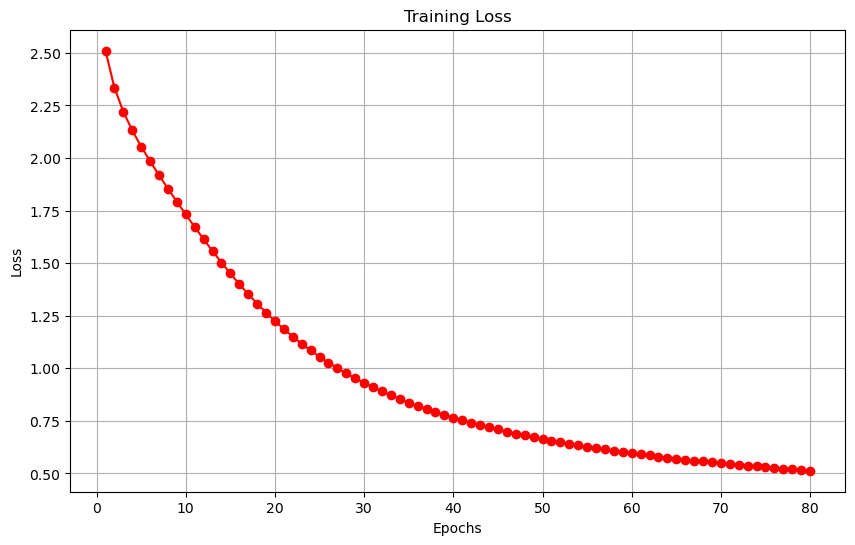

Iteration 1: Accuracy = 0.10574404761904761, Loss = 2.4310782030242013
Iteration 5: Accuracy = 0.521547619047619, Loss = 1.7865100966691583
Iteration 10: Accuracy = 0.7030654761904762, Loss = 1.3654609942141118
Iteration 15: Accuracy = 0.7670238095238096, Loss = 1.1194258389650806
Iteration 20: Accuracy = 0.7956845238095238, Loss = 0.9652418660438443
Iteration 25: Accuracy = 0.8127678571428572, Loss = 0.8613162689604744
Iteration 30: Accuracy = 0.8248511904761905, Loss = 0.7868000648545898
Iteration 35: Accuracy = 0.833452380952381, Loss = 0.7306868307290723
Iteration 40: Accuracy = 0.8403273809523809, Loss = 0.686780570701621
Iteration 45: Accuracy = 0.8467261904761905, Loss = 0.6513737441704319
Iteration 50: Accuracy = 0.8513392857142857, Loss = 0.6221256737627623
Iteration 55: Accuracy = 0.8551488095238096, Loss = 0.5974893186655613
Iteration 60: Accuracy = 0.8583333333333333, Loss = 0.5764016423057468
Iteration 65: Accuracy = 0.8608928571428571, Loss = 0.5581076805400024
Iteration 

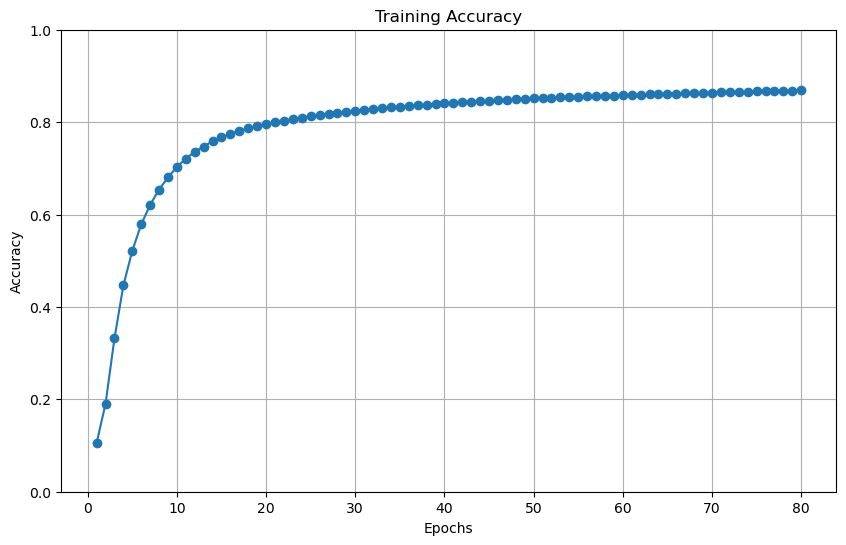

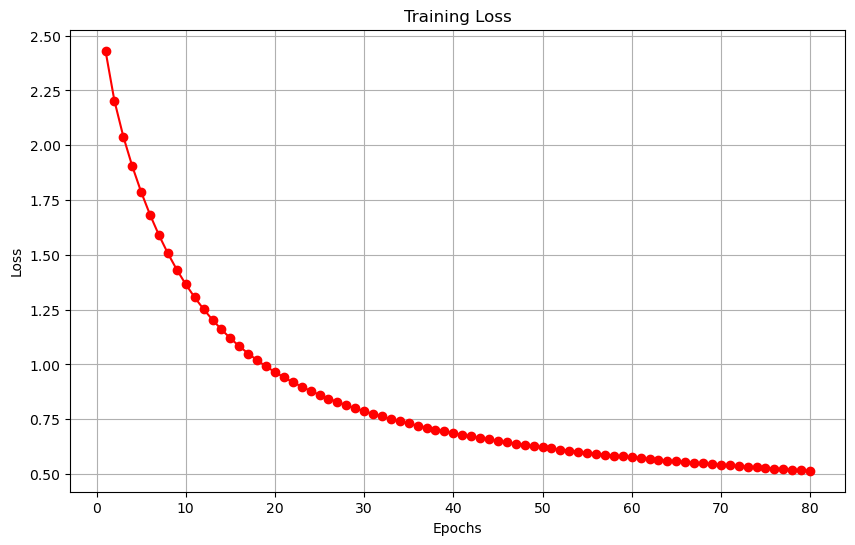

Iteration 1: Accuracy = 0.09708333333333333, Loss = 2.608197529102192
Iteration 5: Accuracy = 0.22497023809523808, Loss = 2.259511887334406
Iteration 10: Accuracy = 0.37080357142857145, Loss = 2.19256341048991
Iteration 15: Accuracy = 0.4712797619047619, Loss = 2.133084227123614
Iteration 20: Accuracy = 0.5391071428571429, Loss = 2.0750989271453
Iteration 25: Accuracy = 0.584047619047619, Loss = 2.0183080239368665
Iteration 30: Accuracy = 0.615297619047619, Loss = 1.962563390785507
Iteration 35: Accuracy = 0.6408035714285715, Loss = 1.9077905346992436
Iteration 40: Accuracy = 0.6603571428571429, Loss = 1.853975372468285
Iteration 45: Accuracy = 0.6754464285714286, Loss = 1.8011512245693415
Iteration 50: Accuracy = 0.6885416666666667, Loss = 1.7493857824197014
Iteration 55: Accuracy = 0.7004761904761905, Loss = 1.6987686731044107
Iteration 60: Accuracy = 0.710952380952381, Loss = 1.6494002230483455
Iteration 65: Accuracy = 0.7209523809523809, Loss = 1.6013818827303072
Iteration 70: Accu

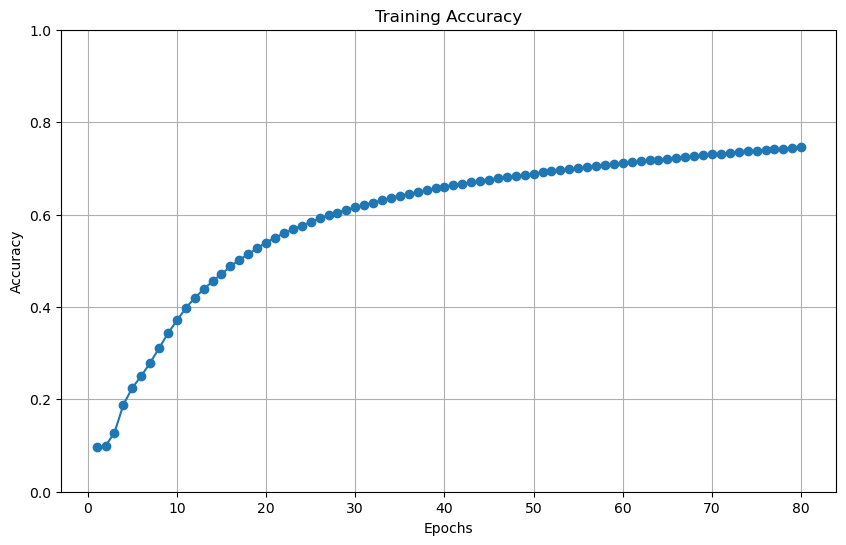

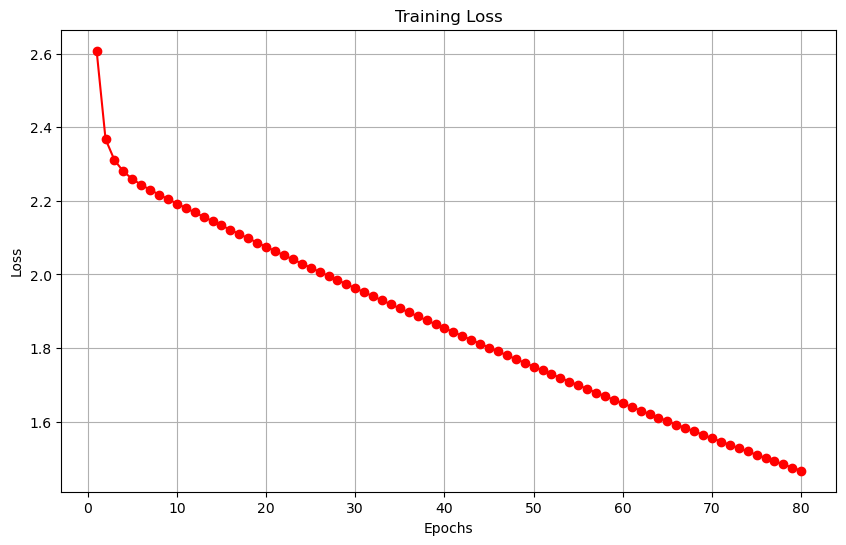

Text(0, 0.5, 'Accuracy')

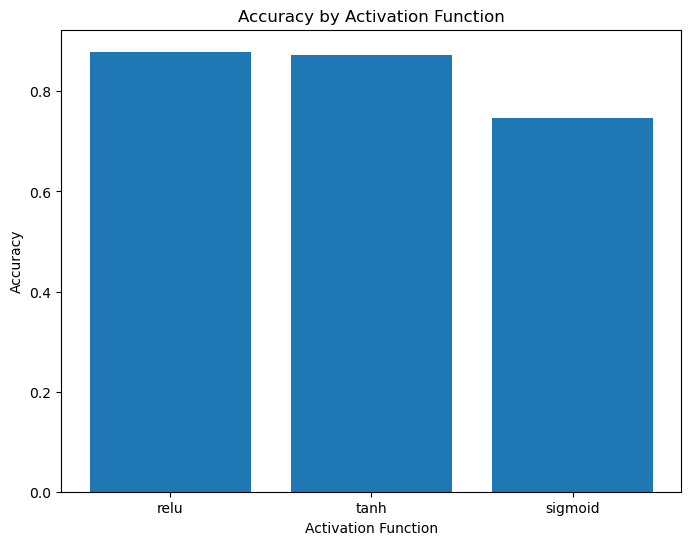

In [3]:
layers_dims = [784, 128, 10]
max_iter = 80
alpha = 0.1
dropout_prob = 0
accuracies = []
losses = []

activation=["relu","tanh","sigmoid"]

for a in activation:
    params = init_params(layers_dims,'xavier')


    trained_params,train_acc,train_loss = train(
        X_train, y_train,params, max_iter, alpha,dropout_prob,a
    )
    
    plot_accuracy_and_loss(train_acc,train_loss,max_iter)
    accuracy,loss = test(X_test,y_test,trained_params,a)
    accuracies.append(accuracy)
    losses.append(loss)

plt.figure(figsize=(8, 6))  
plt.bar(activation, accuracies)

plt.title('Accuracy by Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')

In [7]:
hidden_neurons_range = range(10, 201, 20)
accuracies = []
losses = []

for hidden_neurons in hidden_neurons_range:
    layers_dims = [784, hidden_neurons, 128, 10]  # Update hidden layer neurons
    params = init_params(layers_dims,'xavier')  # Reinitialize parameters

    trained_params, _,__ = train(X_train, y_train, params, max_iter, alpha, dropout_prob)

    accuracy,loss = test(X_test,y_test,trained_params,activation='relu')
    accuracies.append(accuracy)
    losses.append(loss)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(hidden_neurons_range, accuracies)
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Hidden Neurons')

plt.subplot(1, 2, 2)
plt.bar(hidden_neurons_range, losses)
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Hidden Neurons')

plt.tight_layout()
plt.show()

Iteration 1: Accuracy = 0.1, Loss = 2.3040747421748264
Iteration 5: Accuracy = 0.1294047619047619, Loss = 2.2816036685400007
Iteration 10: Accuracy = 0.18041666666666667, Loss = 2.2540541114193813
Iteration 15: Accuracy = 0.22913690476190476, Loss = 2.2189834288206254


KeyboardInterrupt: 

### Multi-layer network

Iteration 1: Accuracy = 0.1, Loss = 2.3040747421748264
Iteration 5: Accuracy = 0.1294047619047619, Loss = 2.2816036685400007
Iteration 10: Accuracy = 0.18041666666666667, Loss = 2.2540541114193813
Iteration 15: Accuracy = 0.22913690476190476, Loss = 2.2189834288206254
Iteration 20: Accuracy = 0.29964285714285716, Loss = 2.1685193244843153
Iteration 25: Accuracy = 0.3987202380952381, Loss = 2.0960519116426544
Iteration 30: Accuracy = 0.47693452380952384, Loss = 1.9934053803746896
Iteration 35: Accuracy = 0.5307440476190476, Loss = 1.8581838409871638
Iteration 40: Accuracy = 0.5803273809523809, Loss = 1.6981145276180394
Iteration 45: Accuracy = 0.6328869047619048, Loss = 1.5273079381106562
Iteration 50: Accuracy = 0.677172619047619, Loss = 1.3603566795023407
Iteration 55: Accuracy = 0.7031845238095238, Loss = 1.2092710510780793
Iteration 60: Accuracy = 0.719672619047619, Loss = 1.0829648514222454
Iteration 65: Accuracy = 0.7338095238095238, Loss = 0.9831376905745985
Iteration 70: Accurac

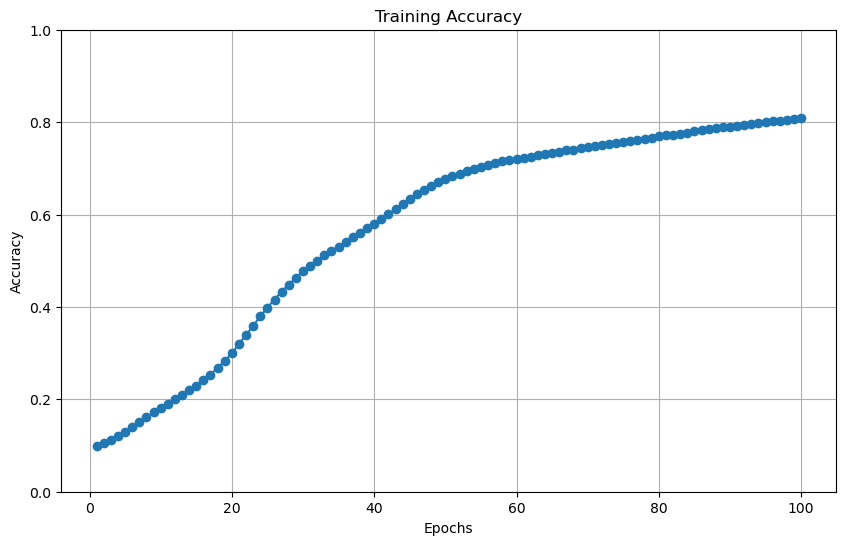

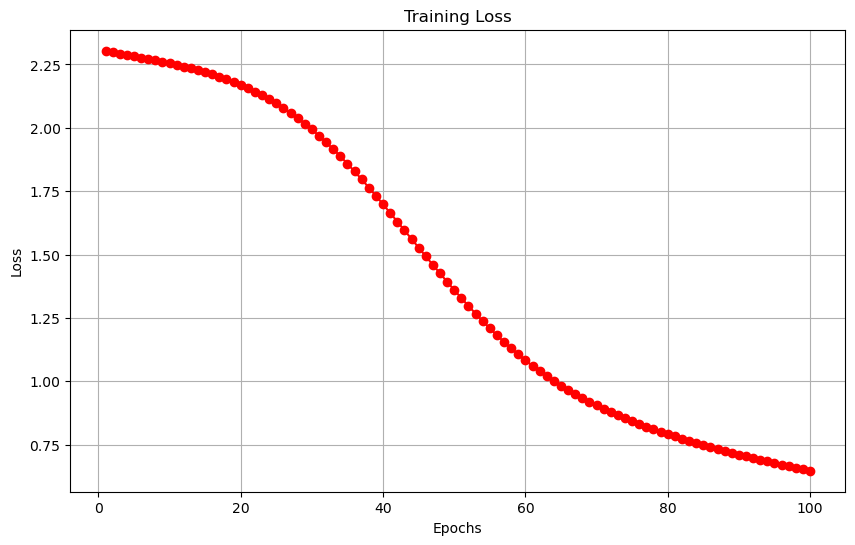

In [9]:
m_layers_dims = [784, 512,224,128, 10]  # Update hidden layer neurons
m_params = init_params(layers_dims,'xavier')  # Reinitialize parameters
max_iter=100

m_trained_params, m_train_accuracy,m_train_loss = train(X_train, y_train, params, max_iter, alpha, dropout_prob)

m_accuracy,m_loss = test(X_test,y_test,trained_params,activation='relu')

plot_accuracy_and_loss(m_train_accuracy,m_train_loss, max_iter)